In [1]:
pip install yfinance pandas numpy matplotlib statsmodels


In [2]:
import yfinance as yf
import pandas as pd

# Download TATAMOTORS stock data for the last 1 year (daily data)
ticker = "TATAMOTORS.NS"  # NSE suffix ".NS" for Yahoo Finance
data = yf.download(ticker, period="1y", interval="1d")

# Display the first few rows of data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                    TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                  
2023-11-22 00:00:00+00:00    679.104370    681.200012    687.349976   
2023-11-23 00:00:00+00:00    677.858215    679.950012    685.900024   
2023-11-24 00:00:00+00:00    671.627441    673.700012    681.950012   
2023-11-28 00:00:00+00:00    695.354187    697.500000    699.450012   
2023-11-29 00:00:00+00:00    710.158508    712.349976    714.400024   

Price                               Low          Open        Volume  
Ticker                    TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS  
Date                                                                 
2023-11-22 00:00:00+00:00    676.049988    683.950012       9279642  
2023-11-23 00:00:00+00:00    677.049988    683.200012       5885370  
2023-11-24 00:00:00+00:00    671.250000    681.400024       6951690  
2023-11-28 

In [3]:
#preapare the data

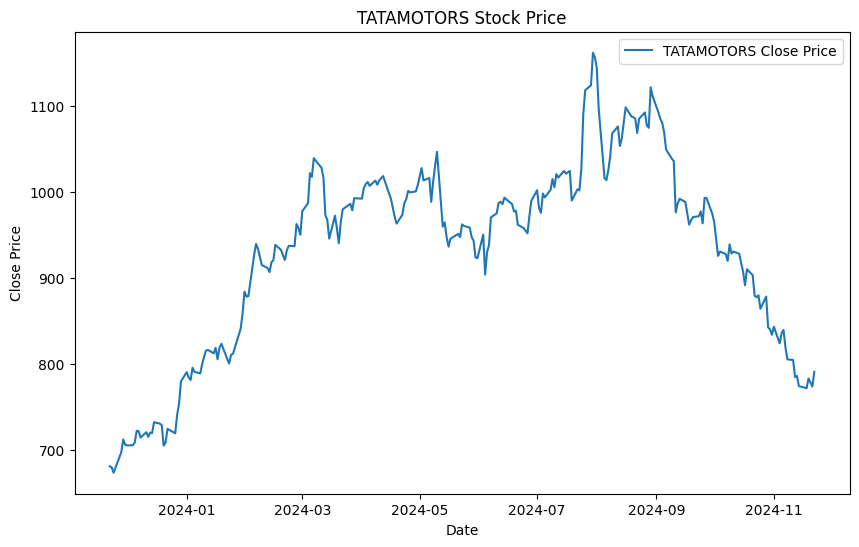

In [4]:
# Select 'Close' prices and ensure the Date is the index
data = data[['Close']]

# Drop missing values if any
data = data.dropna()

# Plot the time series to visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label="TATAMOTORS Close Price")
plt.title("TATAMOTORS Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


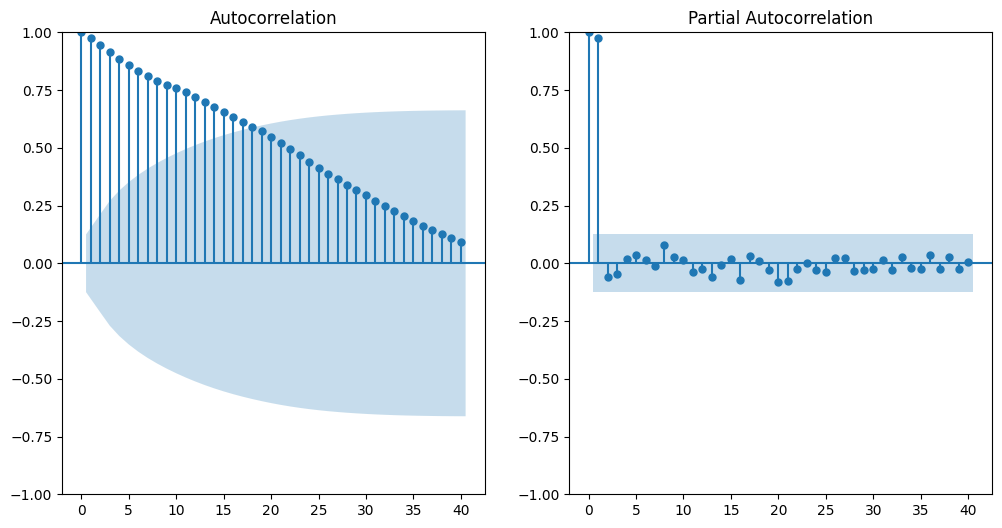

In [5]:
#plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(data['Close'], lags=40, ax=plt.gca())

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(data['Close'], lags=40, ax=plt.gca())

plt.show()


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example: ARIMA(1, 0, 2))
model = ARIMA(data['Close'], order=(1, 0, 2))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          TATAMOTORS.NS   No. Observations:                  246
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1057.549
Date:                Fri, 22 Nov 2024   AIC                           2125.097
Time:                        13:36:07   BIC                           2142.624
Sample:                             0   HQIC                          2132.155
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        851.0224     83.849     10.150      0.000     686.682    1015.363
ar.L1          0.9886      0.009    114.619      0.000       0.972       1.006
ma.L1          0.0605      0.061      0.999      0.3

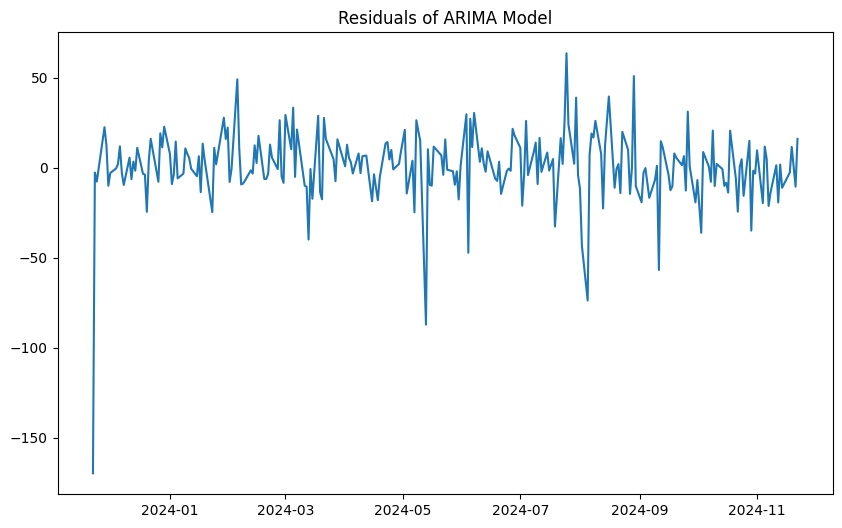

<Figure size 1000x600 with 0 Axes>

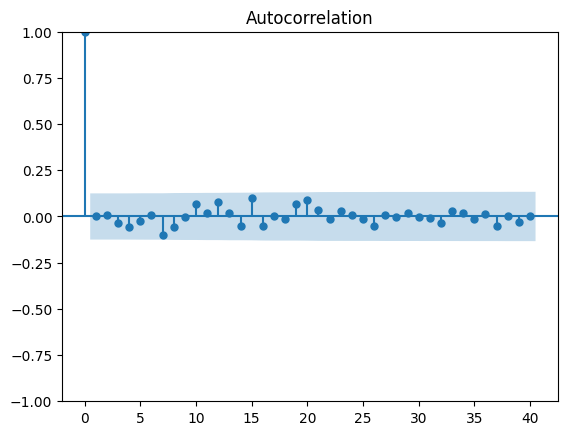

     lb_stat  lb_pvalue
10  5.831932    0.82918


In [7]:
# Residuals analysis
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# ACF of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=40)
plt.show()

# Ljung-Box Test for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_results)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


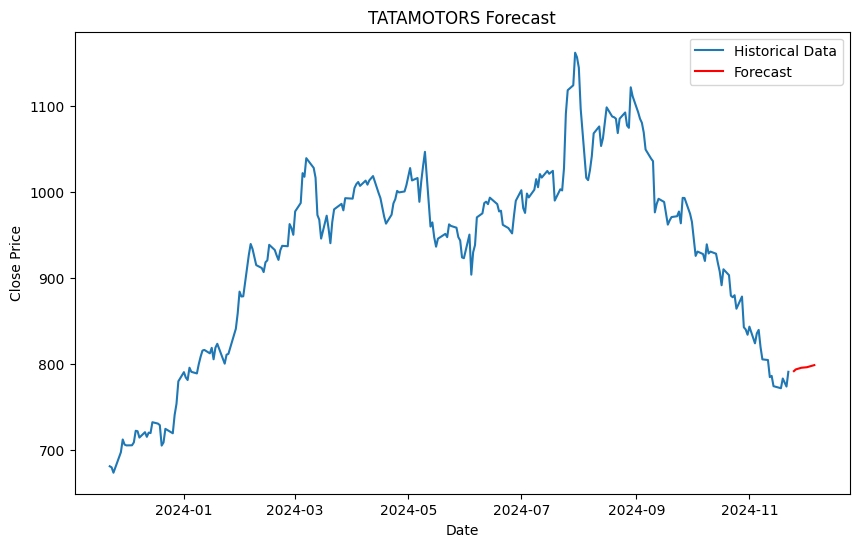

In [8]:
# Forecast the next 10 days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label="Historical Data")
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='B')[1:], forecast, label="Forecast", color='red')
plt.title("TATAMOTORS Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compare the forecast with actual data if you have a holdout sample
# Assume you split the data, here is a hypothetical comparison:
actual = data['Close'][-forecast_steps:]
mae = mean_absolute_error(actual, forecast)
rmse = np.sqrt(mean_squared_error(actual, forecast))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 16.307556006949028
Root Mean Squared Error: 17.85177836239063
